# Descarga de un gas por un orificio


## Modelo
Este  modelo determina el flujo màsico de descarga de un gas a través  de un orificio 



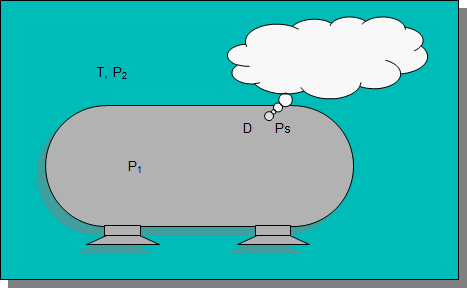

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|Rg|Constante de los gases| 8314 atm L/ K mol|
|k|Capacidad calorífica especifica|1.15 Pa m^3/mol K|
|D|Diámetro el orificio |10mm|
|P1|Presión antes del orificio |5.01 bar|
|P2|Presión en el orificio |1.01 bar|
|T|Temperatura |298K|
|PM|Peso molecular del gas |44 kg/kgmol|
|HLF1|Pérdidas de fricción en la entrada |0.5|
|HLF2|Pérdidas de fricción en la salida |1|
|CD|Coeficiente de Descarga |0.85|

### Variables
|Variable|Significado|Unidades|
|------|------|------|
|A|Área del orificio| |
|$\rho$|Densidad del gas en la salida| |
|HLFT|Pérdidas de fricción Total| |
|Y|Factor de expansión| |
|Ps|Razón de presión sónica| |
|Pchoque|Presión sónica| |

### Variables
|Variable|Significado|Unidades|
|------|------|------|
|m|Flujo másico sónico| |

### Consideraciones
- El origen de la descarga del gas puede ser por un orificio, cerca de un contenedor, a lo largo de una linea de tuberia, válvula  de seguridad o un proceso de venteo
- Para la descarga de gases se tienen dos modelos : Isotérmico y   Adiabático,  pero el adiabático predice mejor la realidad.


## Desarrollo y ecuaciones

## Método isotérmico

Los modelos de descarga estan basados en el Balance de Energía Mecánica
- Ecuación 1. $\int_{P_1}^{P_2} \frac{dP}{p}+\frac{g}{g_c}(Z_2-Z_1)+\frac{1}{2g_c}(V_2^2-V_1^2)+\sum ef+\frac{W_s}{m}=0$  

El flux de masa y la velocidad en misma sección  de tuberia es constante.
Las pérdidas de fricción estan representadas en el coeficiente de descarga CD.
La presión cae a través de la descarga, por lo que el gas se expande, de esta manera el término de la integral (presión) en el Balance se requiere especificar las condiciones termodinámicas (k = Cp/Cv) y la  ecuación de estado (gas ideal). Para la descarga a través de un orificio, la ecuación se resulve a condiciones isoentrópicas, sin transferencia de calor, ni trabajo externo.

 Considerando lo anterior la ecuación se transforma de la siguiente forma:
 - Ecuación 2. $m=C_DAP_1\sqrt{\frac{2g_cM}{R_gT_1}\frac{K}{K-1}}\sqrt{{(\frac{P_2}{P_1})^{2/K}-(\frac{P_2}{P_1})^{(K-1)/K}}}$
 
 
 

Como la presión  disminuye a un máximo y esto ocurre cuando la velocidad de descarga del gas alcanza la velocidad sónica del fluido. En este punto el flujo se convierte en independiente de P2 y sólo depende de P1. La ecuación se tranforma en:
- Ecuación 3. $m=C_DAP_1\sqrt{\frac{Kg_cPM}{R_gT}(\frac{2}{K+1})^{\frac{K+1}{K-1}}}$

La presión requerida para alcanzar este máximo, esta dado por la siguiente relación:
- Ecuación 4.  $\frac{P_{choque}}{P_1}=(\frac{2}{K+1})^{\frac{K}{K-1}}$

## Método Adiabático

Usando la formula de Darcy para flujos en condiciones sónico y no-sónico.
- Ecuación 5. $m=YA\sqrt{\frac{2\rho(P_1-P_2)}{HLF_T}}$
- Ecuación 6.$e^{0.0006(Ln(HLF_T))^3-0.0185(Ln(HLF_T))^2+0.114Ln(HLF_T)-0.534}$
- Ecuación 7.$\rho=\frac{P PM}{R_gT}$

La fricción es causada por los efectos de entrada y salida del flujo po el orificio. Para el Número de Reynolds mayor que 10,000; HFL1= 0.5 y HLF2 = 1.0.
Se considera flujo turbulento, por lo tanto el factor de fricción es independiente del número de Reynolds.

##### Factor de expansión Y
Este factor depende de las perdidas de fircción y la capacidad calorífica como se muestra en las figuras 2.4 y 2.5

######       Figura 2.4. Presión sónica para fluidos de comportamiento adiabático, para distintos valores de capacidad calorífica      (k) para todo fluido sónico.
 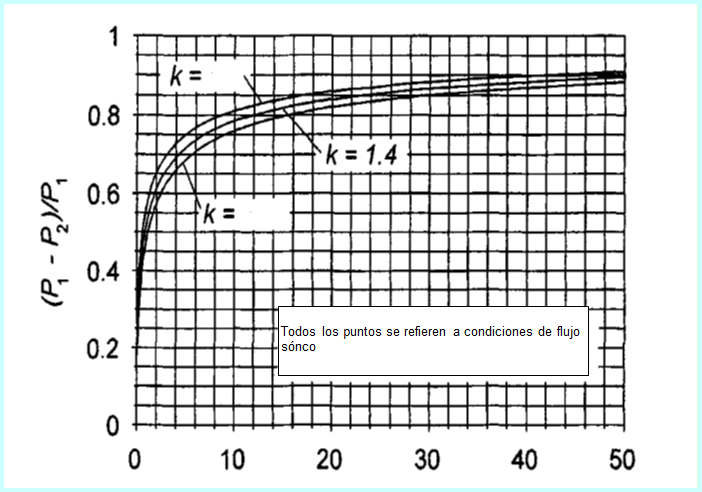

###### Figura 2.5. Factor de expanción  Y para fluidos de comportamiento adiabático, para un valor de k =1.4
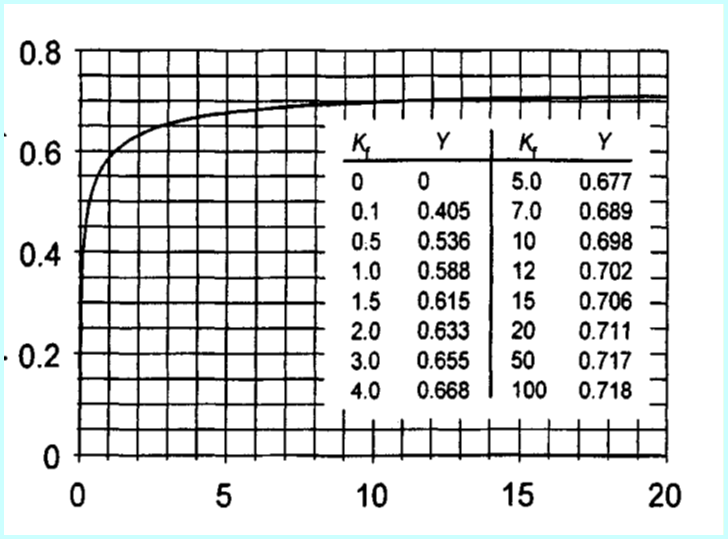

- Para estimar P2
     - Para determinar la presión sónica se obtiene una razón presiones (Ps)
     - Constantes para la ecuación de razón de presiones sónica a diferentes k
     - Ecuación 8. $e^{A(Ln(HLF_T))^3+B(Ln(HLF_T))^2+CLn(HLF_T)+D}$

- Ecuacion 9.$P_S=\frac{P_2-P_1}{P_1}$

## Resultados
## Método isotérmico

In [1]:
#Datos
Rg=8314
k=1.15
D=10
P1=5.01
P2=1.01
T=298
PM=44
HLF1=0.5
HLF2=1
CD=0.85

Debido a que la presión total es menor que la presión de vapor del propano líquido, la fase de la descarga deberá ser vapor, por lo tanto las Ec. para el flujo de descarga, serán las de gases. 
Primero calcularemos Pchoque (choked) con la Ec. 4

In [2]:
P_choque=P1*(2/(k+1))**(k/(k-1))
print("Presión de choque= "+ str(round(P_choque,4)) +" bar")

Presión de choque= 2.8777 bar


Ya que P2 =1,01 bar y es menor que Pchoque (choked), el flujo que pasa a través del orificio es sónico.

Cálculo del área de orificio

In [3]:
import numpy as np
import math
pi=math.pi
Area=(pi/4)*(D*0.001)**2  
print("A= "+ str(round(Area,7)) +" m2")

A= 7.85e-05 m2


Flujo másico con la Ec.3

In [4]:
m_isotermico=CD*Area*P1*100000*np.sqrt((k*k*PM)/(Rg*T))*np.sqrt(((2)/(k+1))**((k+1)/(k-1)))
print("m Isotérmico= "+ str(round(m_isotermico,4)) +" Kg/s")

m Isotérmico= 0.0965 Kg/s


- En este caso se asume que el coeficiente de descarga CD es de 0.85.
- Para NRE > 30,000 se sugiere un valor de 0.61,     la descarga en una tobera CD=1.0
- Para secciones cortas en una tuberia (L/D>3)  CD = 0.81,  pero si no se conociera el valor se recomienda usar el valor de 1

## Método adiabático

Densidad para gas ideal

In [5]:
p=(P1*PM*100000)/(Rg*T)
print("p= "+ str(round(p,4)) +" Kg/m^3")

p= 8.8974 Kg/m^3


Factor de expansión Y

In [6]:
HLFT=HLF1+HLF2
Y=np.exp(0.0006*np.log(HLFT)**3-0.0185*np.log(HLFT)**2+0.1141*np.log(HLFT)-0.5304)
print("Y= "+ str(round(Y,4))) 

Y= 0.6144


Razón de presión actual,esta debe ser mayor que la razón de presiones sonica

In [7]:
Ps1=(P1-P2)/P1
print("Ps= "+ str(round(Ps1,4))) 

Ps= 0.7984


Cálculo de Ps a diferentes K 

In [55]:

#Constantes
Cp=np.array([1.2,1.4,1.67])
A=np.array([0.0009,0.0011,0.0013])
B=np.array([-0.0308,-0.0302,-0.0287])
C=np.array([0.261,0.238,0.213])
D=np.array([-0.7248,-0.6455,-0.5633])
Ps2=np.exp(A*np.log(HLFT)**3+B*np.log(HLFT)**2+C*np.log(HLFT)+D)
    

print('{:^10}''{:^10}'.format('Cp','Ps'))

for i in range(len(Cp)):
    
    print('{:^10.2f}''{:^10.4f}'.format(Cp[i],Ps2[i]))

    Cp        Ps    
   1.20     0.5358  
   1.40     0.5747  
   1.67     0.6178  


Presiones sónicas

In [58]:
Psonica=P1*(1-Ps2)


print('{:^10}''{:^10}'.format('Cp','Psonica[bar]'))

for i in range(len(Cp)):

    print('{:^10.2f}''{:^10.4f}'.format(Cp[i],Psonica[i]))

    Cp    Psonica[bar]
   1.20     2.3256  
   1.40     2.1307  
   1.67     1.9148  


Flujos másicos

CON ECUACIÓN 5.
- $m=YA\sqrt{\frac{2\rho(P_1-P_2)}{HLF_T}}$

In [63]:
m_adiabatico=Y*Area*np.sqrt((2*p*(P1-Psonica)*100000)/HLFT)


print('{:^10}''{:^10}'.format('Cp','m Adiabático [kg/s]'))
for i in range(len(Cp)):

    print('{:^10.2f}''{:^10.4f}'.format(Cp[i],m_adiabatico[i]))

    Cp    m Adiabático [kg/s]
   1.20     0.0861  
   1.40     0.0892  
   1.67     0.0925  


Los valores de    m     obtenidos   no    corresponden   con    el propano, que   tiene  un   valor  de  cp = 1.15,  por lo  que  se  debe   interpolar con   los   valores   de    cp=1.4   y   cp=1.2


### Interpolación

In [64]:
pendiente=(m_adiabatico[1]-m_adiabatico[0])/(Cp[1]-Cp[0])
Cpx=1.15
m_interpolacion=pendiente*(Cpx-Cp[0])+m_adiabatico[0]
print("m Adiabatico= "+ str(round(m_interpolacion,4))+ " Kg/s")

m Adiabatico= 0.0853 Kg/s


### Resultados

In [65]:
print("Flujo másico metodo Isotérmico= "+ str(round(m_isotermico,4))+ " Kg/s")
print("Flujo másico metodo Adiabático= "+ str(round(m_interpolacion,4))+ " Kg/s")


Flujo másico metodo Isotérmico= 0.0965 Kg/s
Flujo másico metodo Adiabático= 0.0853 Kg/s
